In [159]:
#import packages
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Loading and Initial Inspection

In [161]:
#reading the data
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [162]:
df.shape

(7043, 21)

In [163]:
# check columns, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [164]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Handling Missing Values

In [165]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


since there are not any missing values

In [166]:
#removing the spaces
df.columns = df.columns.str.replace(' ', '_')

Manipulating the dataset

In [167]:
# droping the customerID because it is not useful
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [168]:
#here in the data set, on deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
#Here we see that the TotalCharges has 11 missing values

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [169]:
#It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [170]:
##Let's see if there are any other 0 values in the tenure column.
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [171]:
#There are no additional missing values in the Tenure column.
#Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.#
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [172]:
#imparting the mean values
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [173]:
#mapping the SeniorCitizen values
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Univariate Analysis

Categorical Features

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


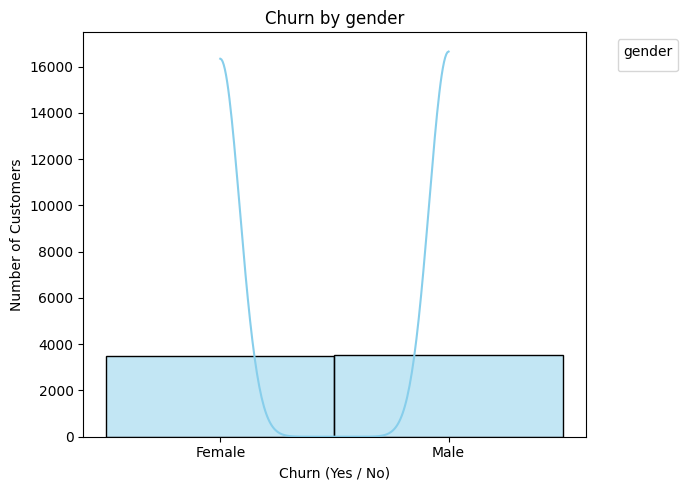

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


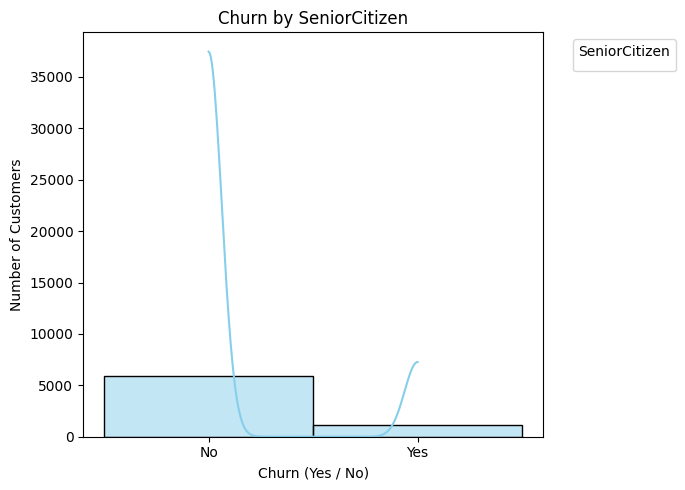

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


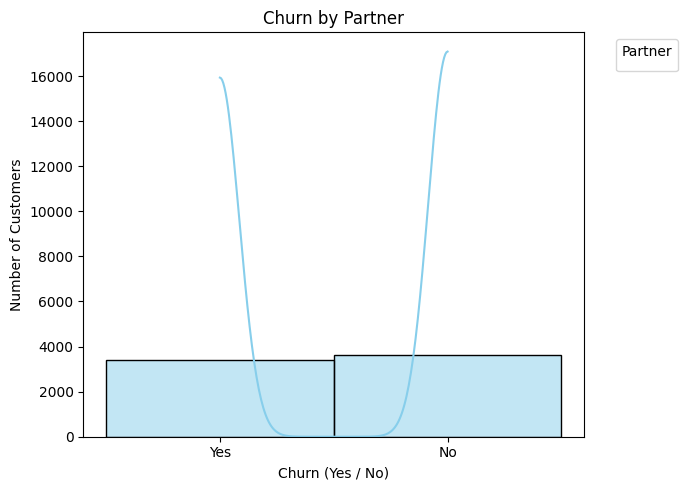

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


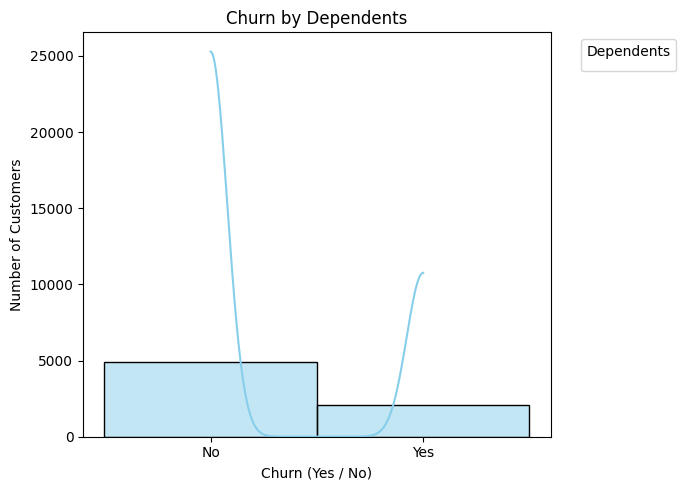

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


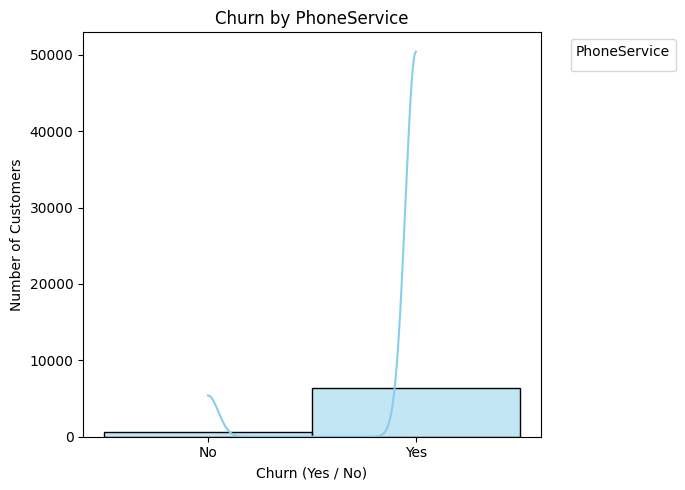

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


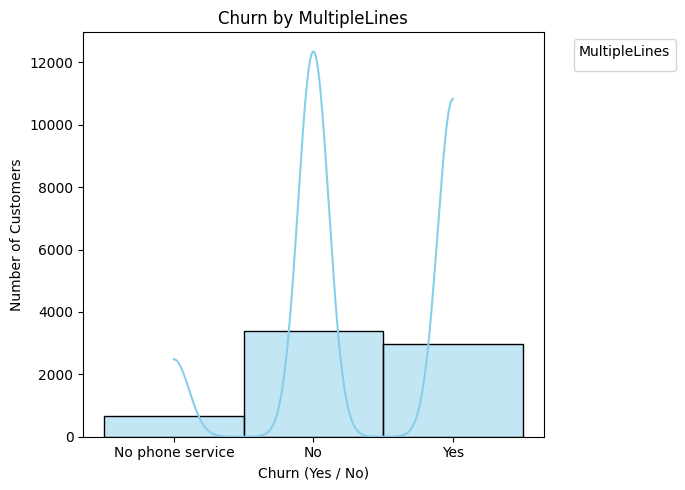

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


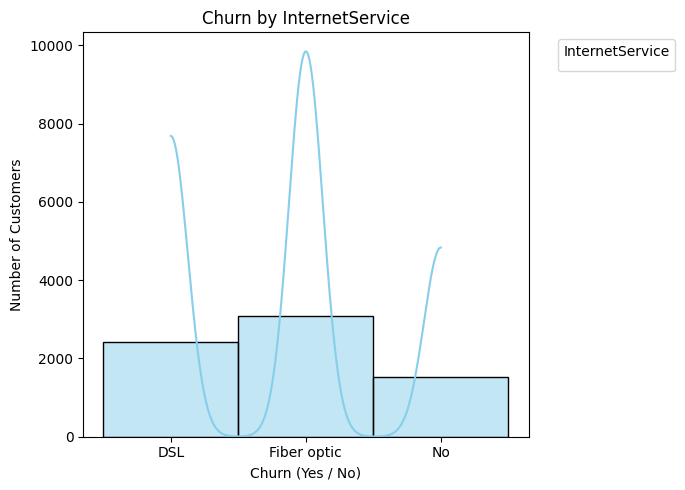

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


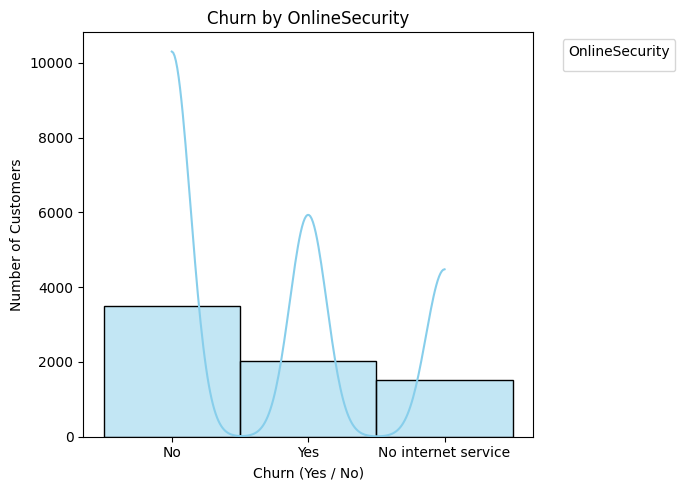

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


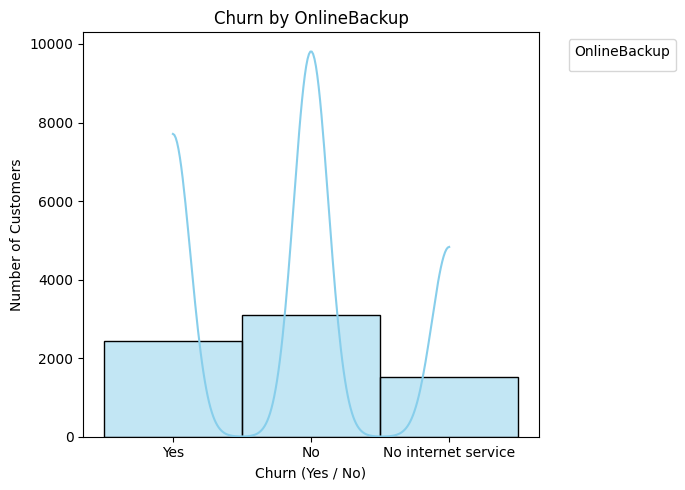

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


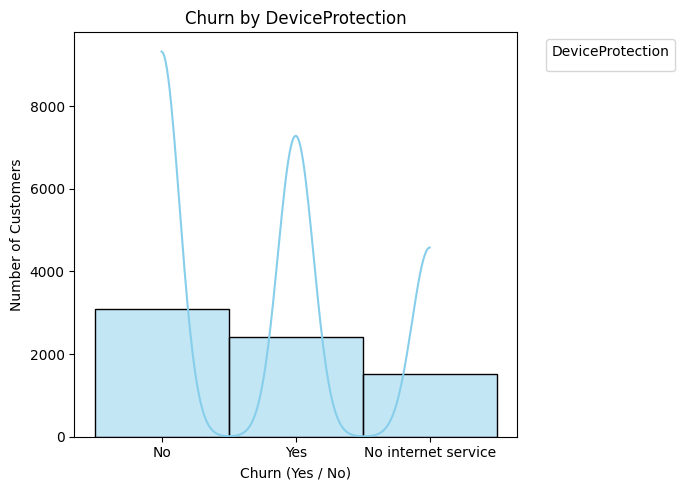

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


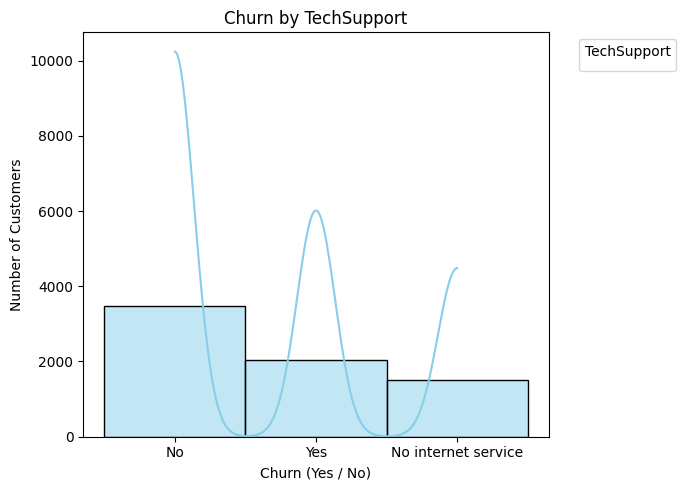

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


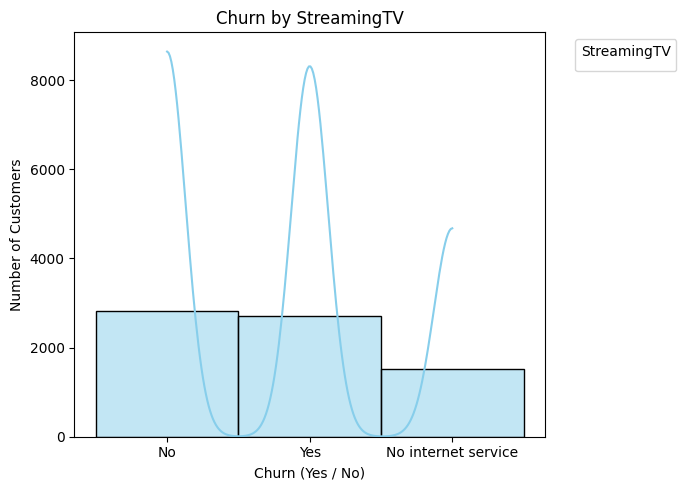

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


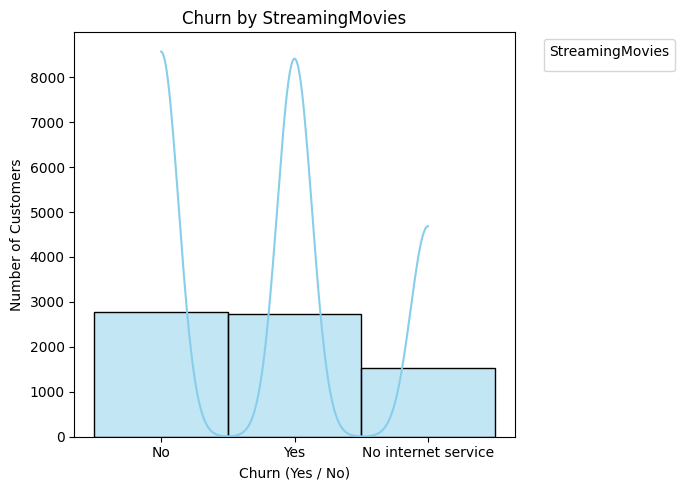

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


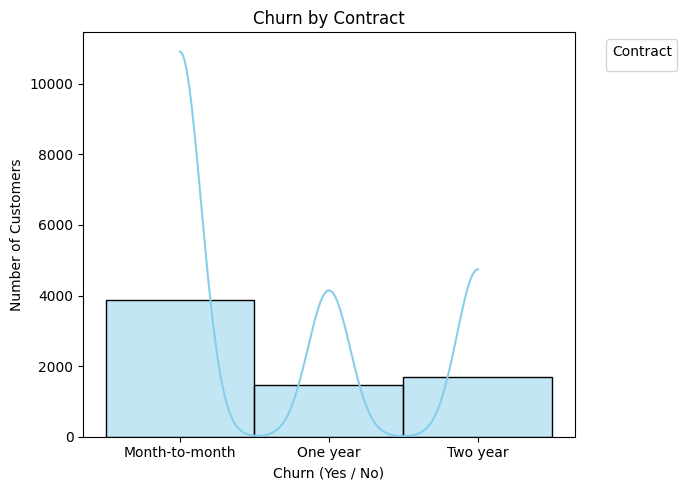

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


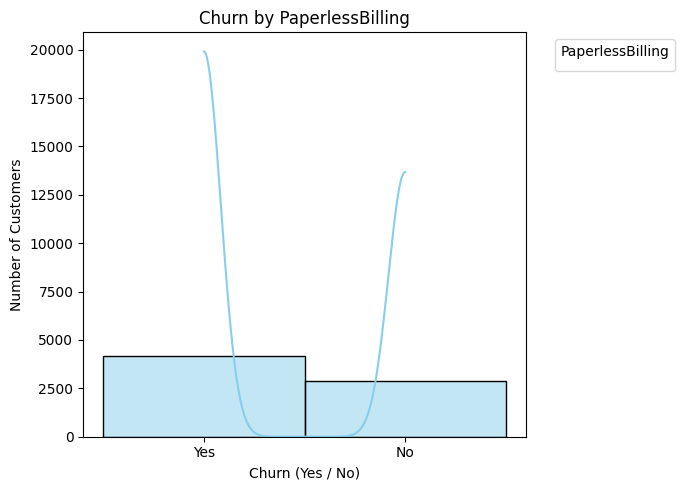

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


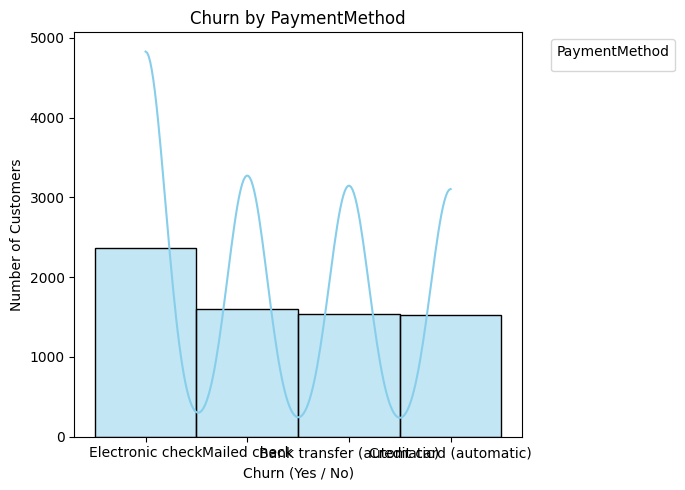

/tmp/ipython-input-3974523324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


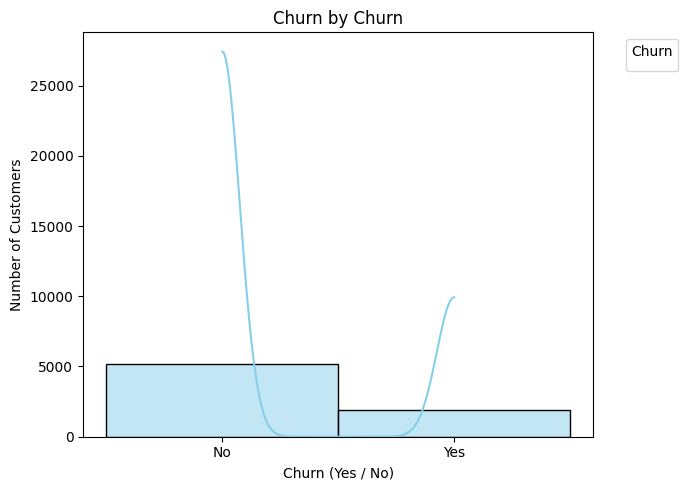

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(7,5))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Churn by {col}")
    plt.xlabel("Churn (Yes / No)")
    plt.ylabel("Number of Customers")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Numerical Features

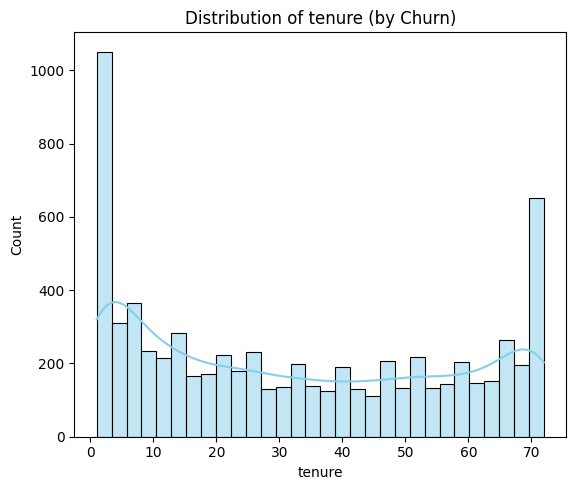

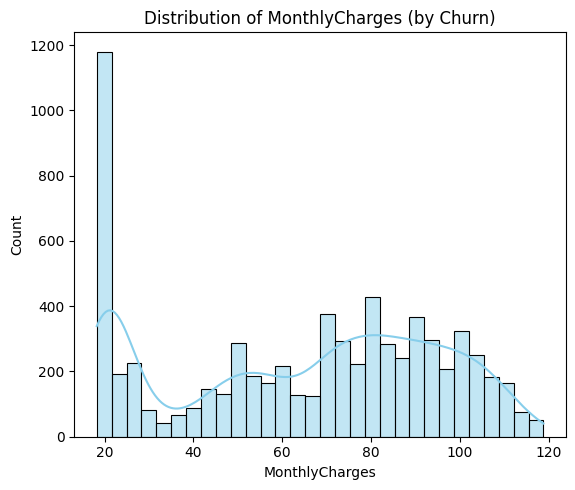

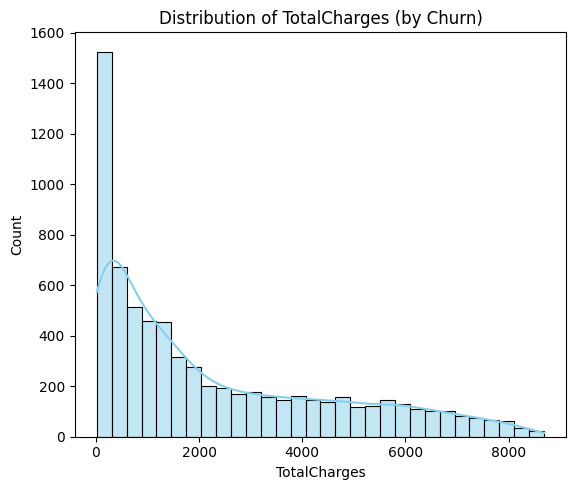

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_features:
    plt.figure(figsize=(16,5))
    plt.subplot(1,3,1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col} (by Churn)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Bivariate Analysis

Categorical vs. Categorical(target)

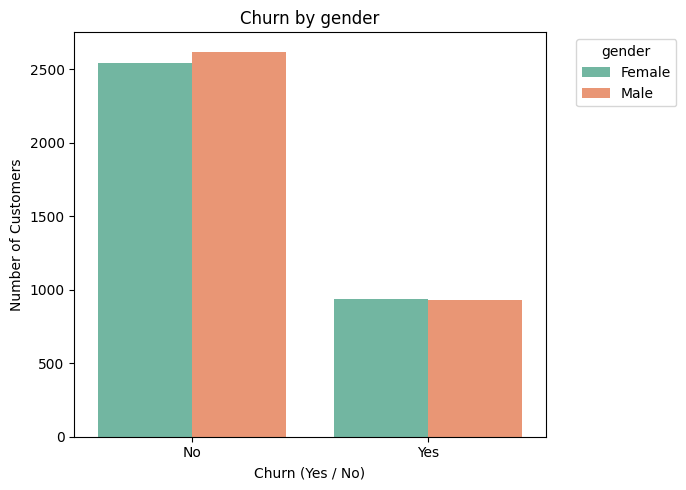

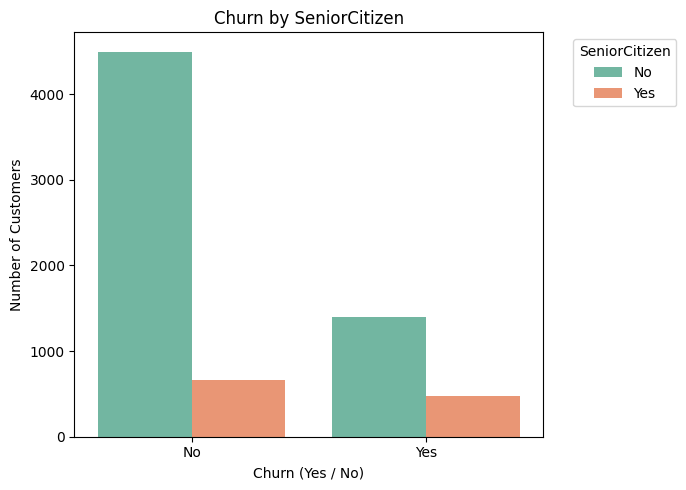

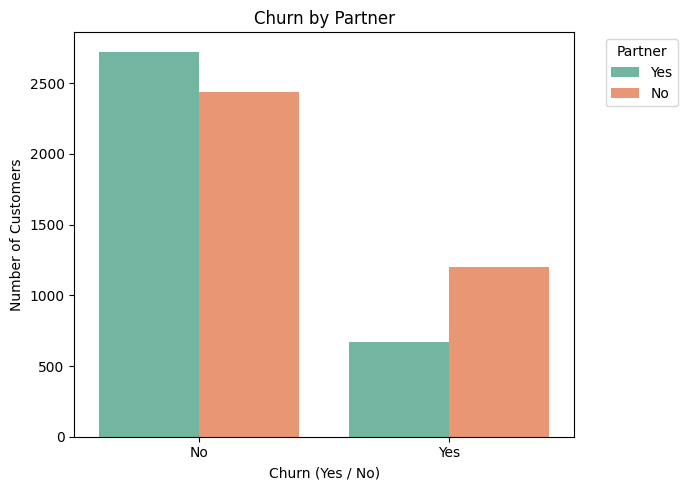

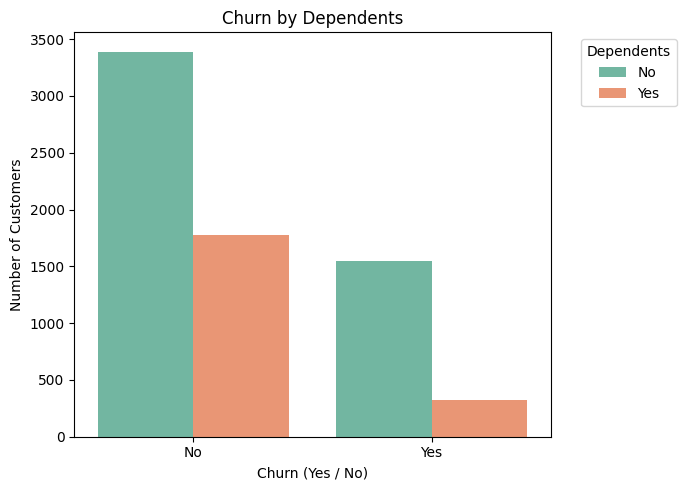

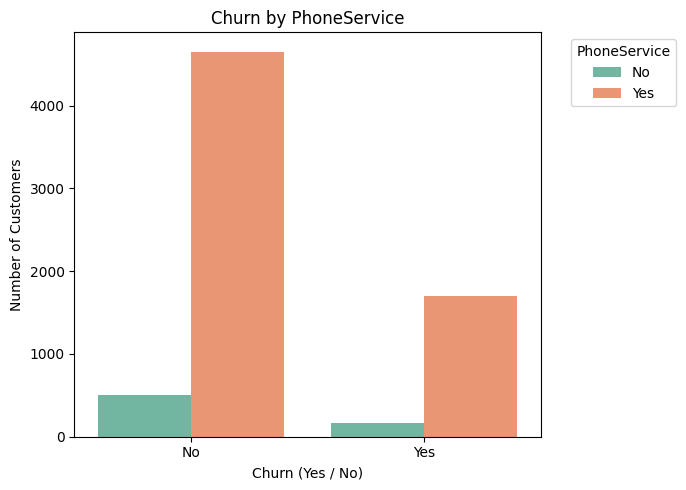

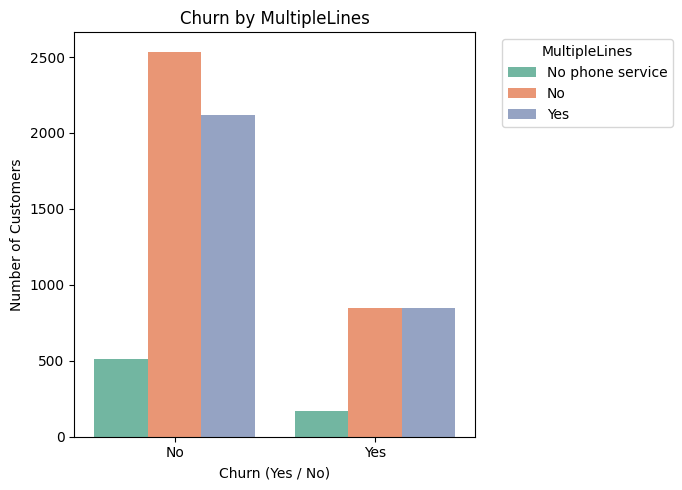

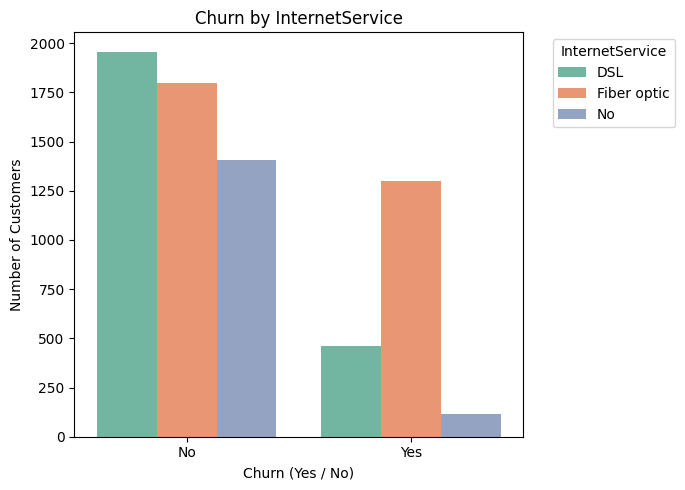

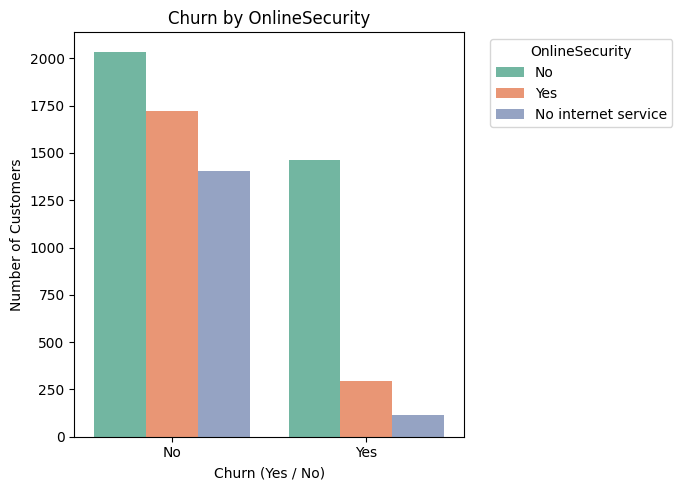

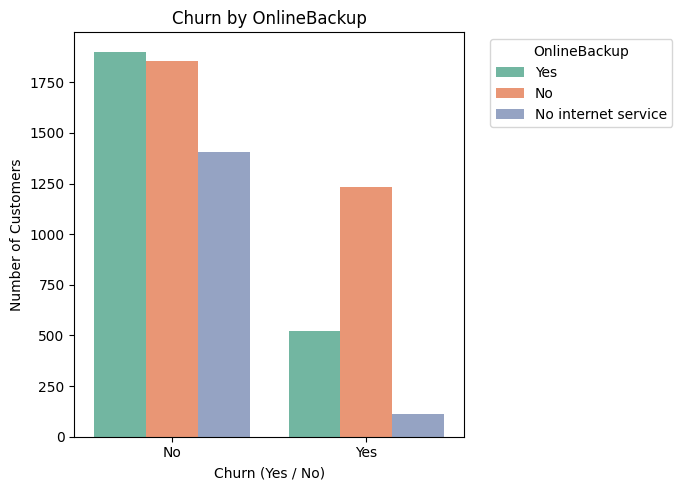

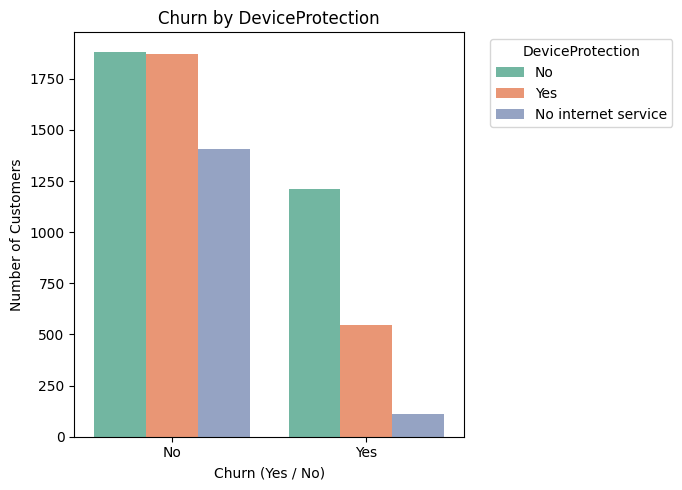

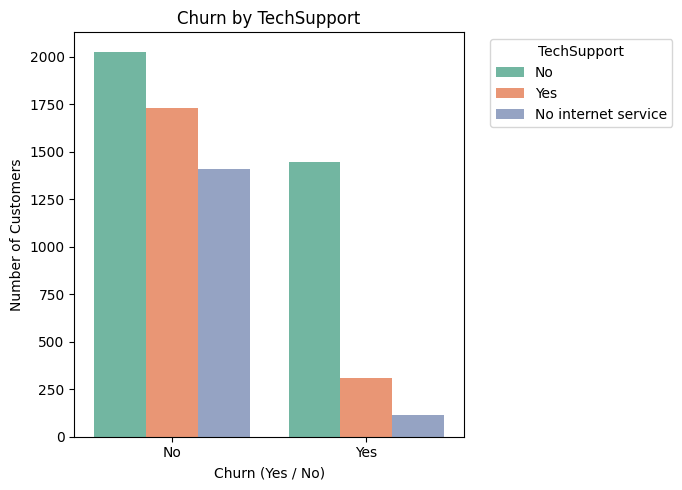

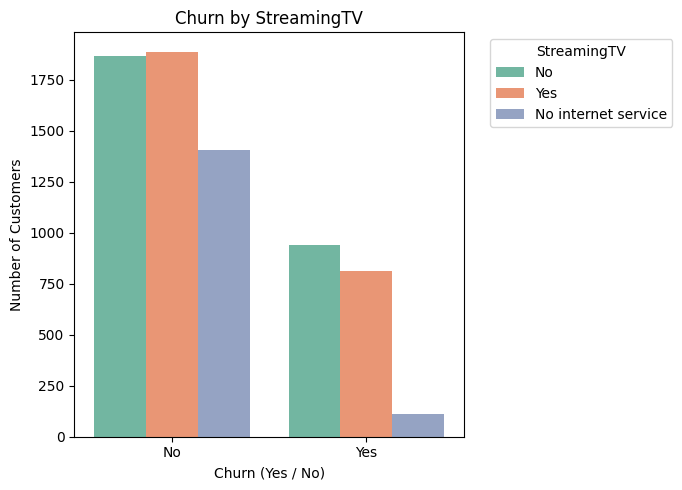

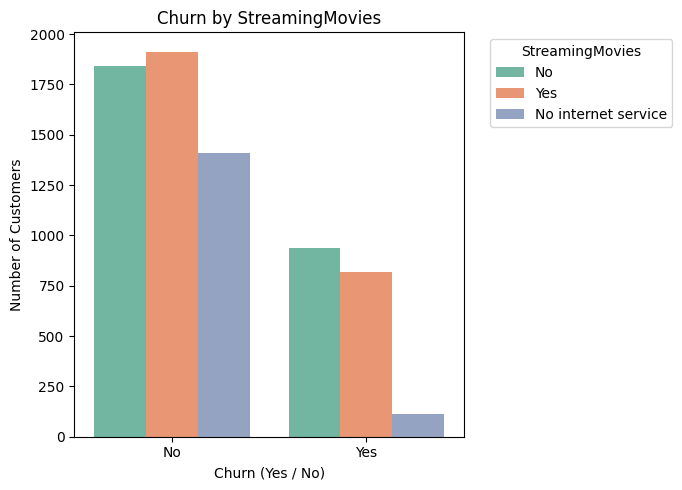

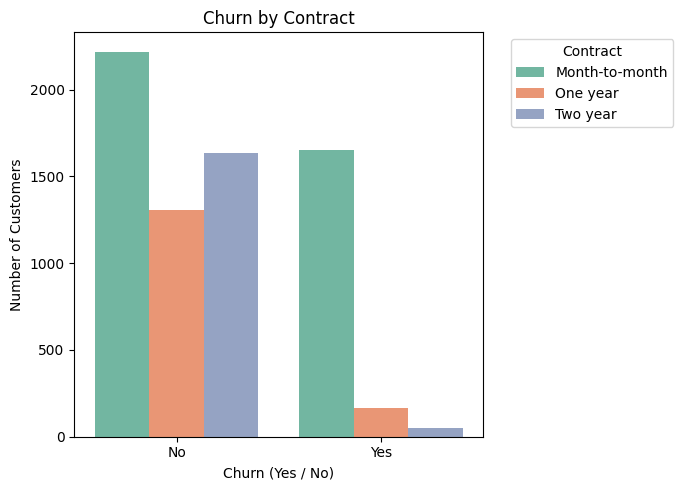

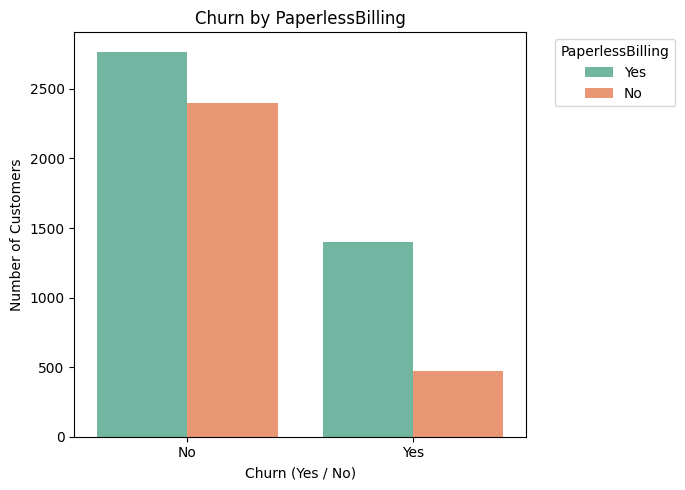

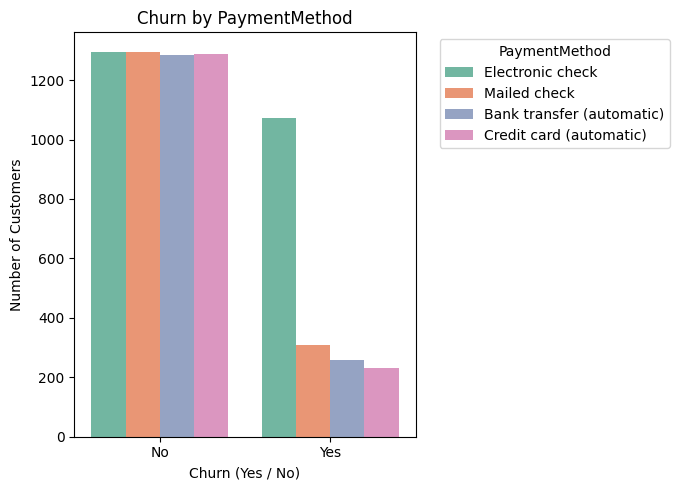

/tmp/ipython-input-3681082265.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')


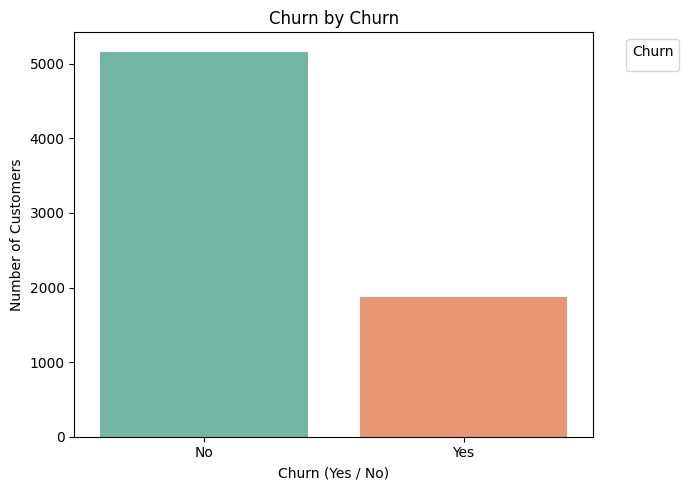

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(7,5))
    sns.countplot(x='Churn', hue=col, data=df, palette="Set2")
    plt.title(f"Churn by {col}")
    plt.xlabel("Churn (Yes / No)")
    plt.ylabel("Number of Customers")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [177]:
from scipy.stats import chi2_contingency

for col in categorical_features:
    ctab = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(ctab)
    print(f"{col} vs Churn → Chi2 = {chi2:.2f}, p-value = {p:.4f}")


gender vs Churn → Chi2 = 0.48, p-value = 0.4905
SeniorCitizen vs Churn → Chi2 = 158.44, p-value = 0.0000
Partner vs Churn → Chi2 = 157.50, p-value = 0.0000
Dependents vs Churn → Chi2 = 186.32, p-value = 0.0000
PhoneService vs Churn → Chi2 = 0.87, p-value = 0.3499
MultipleLines vs Churn → Chi2 = 11.27, p-value = 0.0036
InternetService vs Churn → Chi2 = 728.70, p-value = 0.0000
OnlineSecurity vs Churn → Chi2 = 846.68, p-value = 0.0000
OnlineBackup vs Churn → Chi2 = 599.18, p-value = 0.0000
DeviceProtection vs Churn → Chi2 = 555.88, p-value = 0.0000
TechSupport vs Churn → Chi2 = 824.93, p-value = 0.0000
StreamingTV vs Churn → Chi2 = 372.46, p-value = 0.0000
StreamingMovies vs Churn → Chi2 = 374.27, p-value = 0.0000
Contract vs Churn → Chi2 = 1179.55, p-value = 0.0000
PaperlessBilling vs Churn → Chi2 = 256.87, p-value = 0.0000
PaymentMethod vs Churn → Chi2 = 645.43, p-value = 0.0000
Churn vs Churn → Chi2 = 7026.88, p-value = 0.0000


Numerical vs. Categorical (Target Variable):

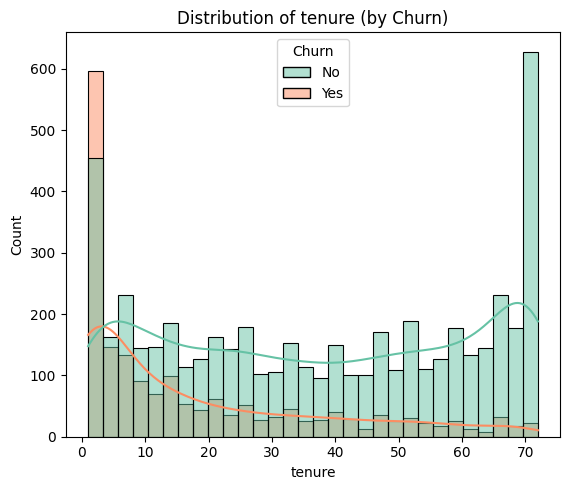

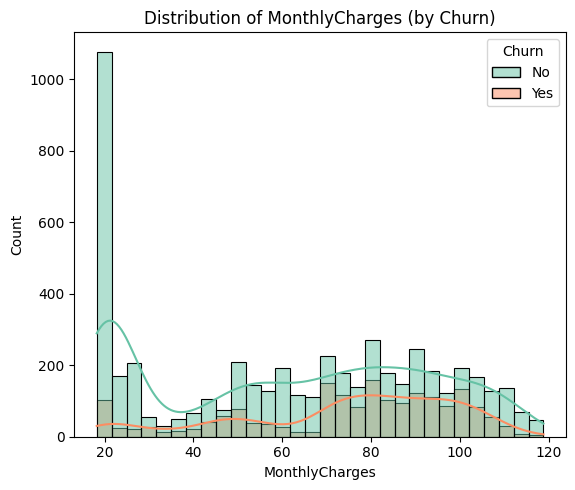

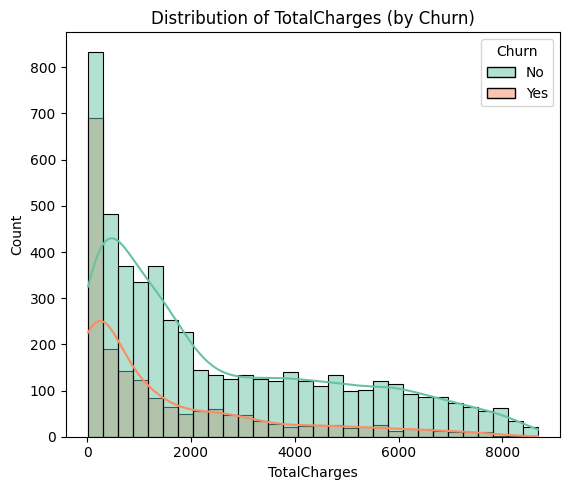

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_features:
    plt.figure(figsize=(16,5))
    plt.subplot(1,3,1)
    sns.histplot(df, x=col, hue='Churn', kde=True, bins=30, palette="Set2")
    plt.title(f"Distribution of {col} (by Churn)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [179]:
from scipy.stats import ttest_ind, mannwhitneyu

for col in numerical_features:
    churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
    churn_no  = df[df['Churn'] == 'No'][col].dropna()

    # Independent T-test
    t_stat, t_p = ttest_ind(churn_yes, churn_no, equal_var=False)

    # Mann-Whitney U test
    u_stat, u_p = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

    print(f"{col}")
    print(f"T-test: t = {t_stat:.2f}, p = {t_p:.4f}")
    print(f"Mann-Whitney U: U = {u_stat:.2f}, p = {u_p:.4f}")


tenure
T-test: t = -34.97, p = 0.0000
Mann-Whitney U: U = 2494979.00, p = 0.0000
MonthlyCharges
T-test: t = 18.34, p = 0.0000
Mann-Whitney U: U = 5986148.50, p = 0.0000
TotalCharges
T-test: t = -18.80, p = 0.0000
Mann-Whitney U: U = 3360665.00, p = 0.0000


Numerical vs. Numerical:

Scatter Plots

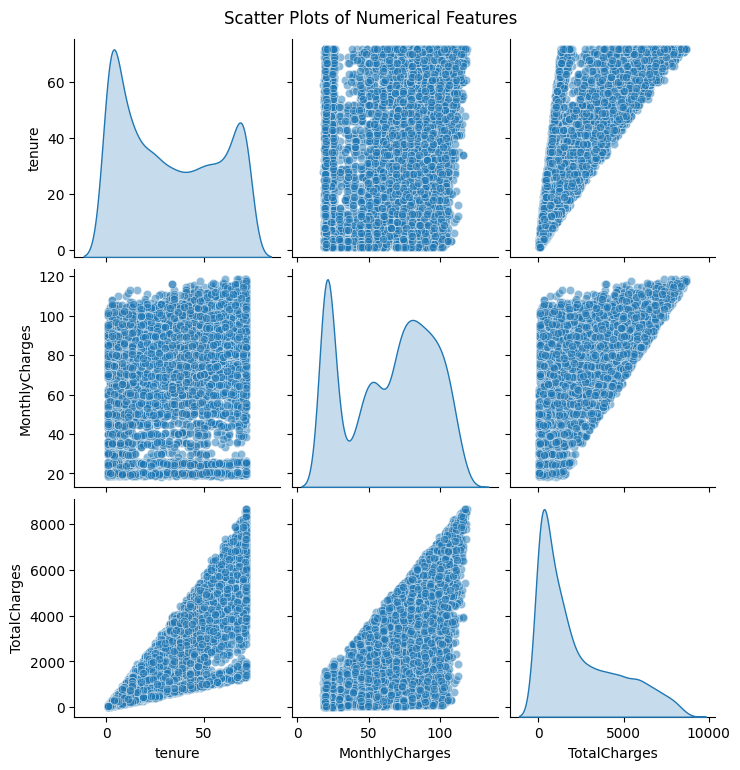

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Scatter plot matrix for quick overview
sns.pairplot(df[numerical_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Scatter Plots of Numerical Features", y=1.02)
plt.show()


Correlation Matrix

In [181]:
# Correlation matrix
corr_matrix = df[numerical_features].corr()

print("Correlation Matrix:\n", corr_matrix)


Correlation Matrix:
                   tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


Heatmap Visualization

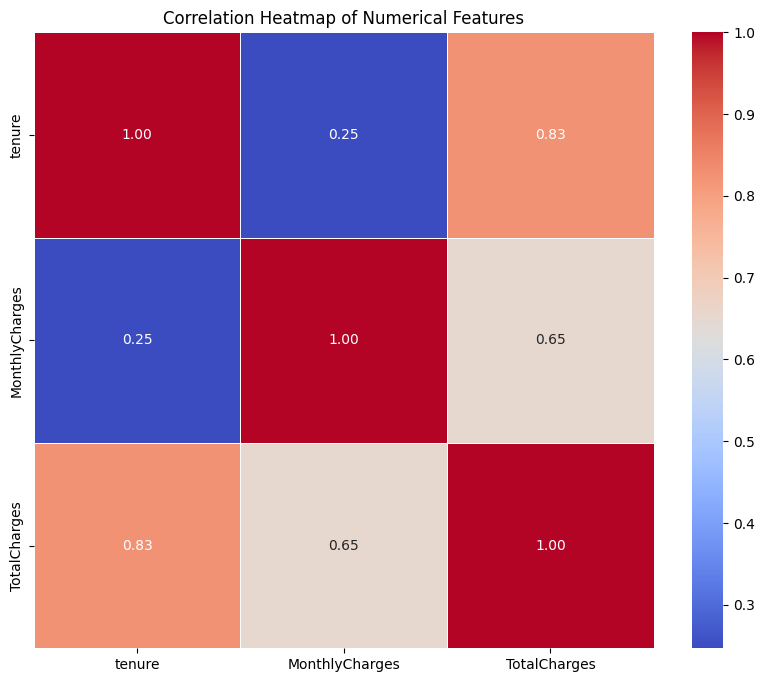

In [182]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Hypothesis Testing

Hypothesis 1: Customers with month-to-month contracts are more likely to churn than those with longer-term contracts. (Test using chi-squared test)

In [183]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
ctab = pd.crosstab(df['Contract'], df['Churn'])

print("Contingency Table:\n", ctab)

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(ctab)

print(f"\nChi-squared Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("Reject H0 → There is a significant association between contract type and churn.")
else:
    print("Fail to reject H0 → No significant association found.")


Contingency Table:
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48

Chi-squared Statistic: 1179.55
p-value: 0.0000
Reject H0 → There is a significant association between contract type and churn.


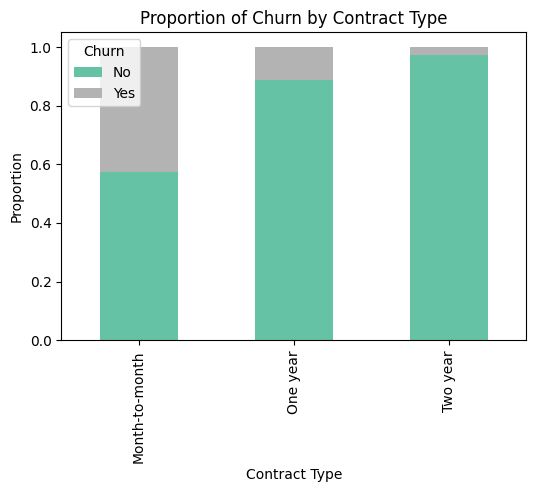

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

ctab_norm = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
ctab_norm.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("Proportion of Churn by Contract Type")
plt.ylabel("Proportion")
plt.xlabel("Contract Type")
plt.show()


Hypothesis 2: Customers with higher monthly charges are more likely to churn. (Test using t-test or Mann-Whitney U test)

In [185]:
from scipy.stats import ttest_ind, mannwhitneyu

# Separate groups
churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges'].dropna()
churn_no  = df[df['Churn'] == 'No']['MonthlyCharges'].dropna()

# Mann-Whitney U test (robust to non-normality)
u_stat, p_value = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {u_stat:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0 → Monthly charges differ significantly between churned and non-churned customers.")
else:
    print("Fail to reject H0 → No significant difference found.")


Mann-Whitney U Statistic: 5986148.50
p-value: 0.0000
Reject H0 → Monthly charges differ significantly between churned and non-churned customers.


Model Building, Prediction, and Evaluation

Feature engineering

In [186]:
# Average monthly spending
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']
df['Contract_Payment'] = df['Contract'] + '_' + df['PaymentMethod']

Encoding Categorical Features

In [187]:
# For columns with two unique values, we can map them directly or use one hot encoder
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['SeniorCitizen'] = df['SeniorCitizen'].map({'No': 0, 'Yes': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 0, 'Yes': 1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
df['TechSupport'] = df['TechSupport'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})

In [188]:
# For columns with more than two unique values, one-hot encoding is generally preferred

from sklearn.preprocessing import LabelEncoder

# Columns to label encode
multi_cat_features = ['MultipleLines', 'InternetService', 'PaymentMethod', 'Contract', 'Contract_Payment']

# Initialize encoder
le = LabelEncoder()

# Apply encoding
for col in multi_cat_features:
    df[col] = le.fit_transform(df[col])

# Check results
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpend,Contract_Payment
0,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,2,29.85,29.85,No,29.850000,2
1,0,0,0,0,34,1,0,0,1,0,...,0,0,1,0,3,56.95,1889.50,No,55.573529,7
2,0,0,0,0,2,1,0,0,1,1,...,0,0,0,1,3,53.85,108.15,Yes,54.075000,3
3,0,0,0,0,45,0,0,0,1,0,...,0,0,1,0,0,42.30,1840.75,No,40.905556,4
4,1,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,Yes,75.825000,2


Scaling Numerical Features

In [189]:
from sklearn.preprocessing import StandardScaler

num_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


Splitting Data

In [190]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Class distribution in training set before SMOTE:")
print(y_train.value_counts())

#Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nClass distribution in training set after SMOTE:")
print(y_train_res.value_counts())


Class distribution in training set before SMOTE:
Churn
No     4130
Yes    1495
Name: count, dtype: int64

Class distribution in training set after SMOTE:
Churn
No     4130
Yes    4130
Name: count, dtype: int64


In [191]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)


DecisionTreeClassifier(random_state=42)

In [201]:
#predicting
y_pred_dt = dt.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred_dt, pos_label='Yes'))
print("F1-score:", f1_score(y_test, y_pred_dt, pos_label='Yes'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.7014925373134329
Precision: 0.45021645021645024
Recall: 0.5561497326203209
F1-score: 0.49760765550239233
Confusion Matrix:
 [[779 254]
 [166 208]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.75      0.79      1033
         Yes       0.45      0.56      0.50       374

    accuracy                           0.70      1407
   macro avg       0.64      0.66      0.64      1407
weighted avg       0.72      0.70      0.71      1407



In [193]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [204]:
#predicting
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label='Yes'))
print("F1-score:", f1_score(y_test, y_pred_rf, pos_label='Yes'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7583511016346838
Precision: 0.5388127853881278
Recall: 0.6310160427807486
F1-score: 0.5812807881773399
Confusion Matrix:
 [[831 202]
 [138 236]]
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.80      0.83      1033
         Yes       0.54      0.63      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.76      1407



In [195]:
# Train Support Vector Machine

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=42)

In [205]:
#predicting
y_pred_svm = svm.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred_svm, pos_label='Yes'))
print("F1-score:", f1_score(y_test, y_pred_svm, pos_label='Yes'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.6844349680170576
Precision: 0.44822485207100593
Recall: 0.8101604278074866
F1-score: 0.5771428571428572
Confusion Matrix:
 [[660 373]
 [ 71 303]]
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.64      0.75      1033
         Yes       0.45      0.81      0.58       374

    accuracy                           0.68      1407
   macro avg       0.68      0.72      0.66      1407
weighted avg       0.78      0.68      0.70      1407



           Model  Accuracy  Precision    Recall  F1-score
0  Decision Tree  0.701493   0.450216  0.556150  0.497608
1  Random Forest  0.758351   0.538813  0.631016  0.581281
2            SVM  0.684435   0.448225  0.810160  0.577143


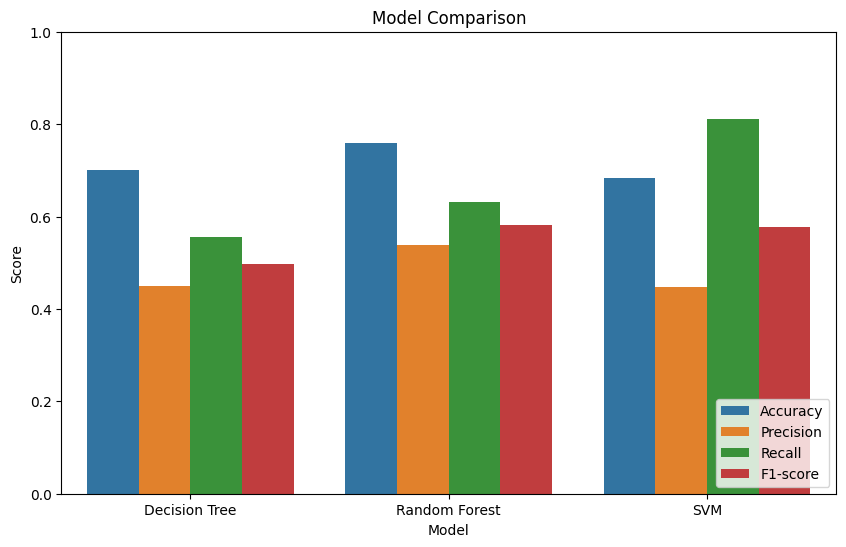

In [209]:
#comparing the models
s
#Store metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

#Function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, pos_label="Yes"))
    results["Recall"].append(recall_score(y_test, y_pred, pos_label="Yes"))
    results["F1-score"].append(f1_score(y_test, y_pred, pos_label="Yes"))

#Evaluate each model
evaluate_model("Decision Tree", dt, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)
evaluate_model("SVM", svm, X_test, y_test)

#Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

#Plot comparison
plt.figure(figsize=(10,6))
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")
plt.title("Model Comparison")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()
